# **Keuntungan 1000 Perusahaan**

## **Sumber Dataset**
https://www.kaggle.com/datasets/rupakroy/1000-companies-profit

- **Nama:** Nabila Neva Rahmawati
- **Email:** nabilanevaaa@gmail.com
- **ID Dicoding:** nabilaneva

# **Import Library**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns
from google.colab import files
from sklearn.preprocessing import  OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error

# **Data Loading**

Pada bagian ini, file kaggle.json di-upload untuk autentikasi ke Kaggle, kemudian API key disalin ke direktori yang tepat. Dataset 1000-companies-profit diunduh dan diekstrak. Setelah itu, file CSV dibaca menggunakan pandas dan lima baris pertama ditampilkan dengan `df.head()` untuk melihat gambaran awal data sebelum analisis lebih lanjut.

In [2]:
# Upload file kaggle.json untuk autentikasi
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"nabilaneva","key":"a2bf5a36173284d034f2e97a666bdf6d"}'}

In [3]:
# Setup API key agar bisa akses Kaggle Dataset
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Download dataset dari Kaggle
!kaggle datasets download -d rupakroy/1000-companies-profit

# Unzip file dataset
!unzip 1000-companies-profit.zip

Dataset URL: https://www.kaggle.com/datasets/rupakroy/1000-companies-profit
License(s): CC0-1.0
Archive:  1000-companies-profit.zip
  inflating: 1000_Companies.csv      


In [4]:
# Membaca file csv
df = pd.read_csv("1000_Companies.csv")

# Menampilkan 5 baris pertama
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


# **Data Understanding**

Pada tahap ini, dilakukan pemahaman awal terhadap data dengan menggunakan fungsi seperti `df.info()` untuk informasi umum, `df.describe()` untuk statistik deskriptif, `df.shape` untuk jumlah baris dan kolom, serta `df.nunique()` untuk jumlah nilai unik di setiap kolom. Selain itu, `df.isna().sum()` digunakan untuk menghitung missing values, dan `df.duplicated().sum()` untuk jumlah duplikat. Kemudian, untuk mendeteksi outlier dengan membuat boxplot untuk kolom numerik, yang menunjukkan titik data yang terletak jauh dari rentang interkuartil. Langkah ini penting untuk memahami kualitas data sebelum analisis lebih lanjut.

In [5]:
# Menampilkan informasi umum tentang dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        1000 non-null   float64
 1   Administration   1000 non-null   float64
 2   Marketing Spend  1000 non-null   float64
 3   State            1000 non-null   object 
 4   Profit           1000 non-null   float64
dtypes: float64(4), object(1)
memory usage: 39.2+ KB


In [6]:
# Menampilkan statistik deskriptif untuk kolom numerik
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,81668.927200,122963.897612,226205.058419,119546.164656
std,46537.567891,12613.927535,91578.393542,42888.633848
min,0.000000,51283.140000,0.000000,14681.400000
25%,43084.500000,116640.684850,150969.584600,85943.198543
50%,79936.000000,122421.612150,224517.887350,117641.466300
75%,124565.500000,129139.118000,308189.808525,155577.107425
max,165349.200000,321652.140000,471784.100000,476485.430000


In [7]:
# Menampilkan jumlah baris dan kolom dalam bentuk tuple
df.shape

(1000, 5)

In [8]:
# Menampilkan jumlah nilai unik di setiap kolom
df.nunique()

,0
R&D Spend,997
Administration,998
Marketing Spend,996
State,3
Profit,998


In [9]:
# Menampilkan missing values
df.isna().sum()

,0
R&D Spend,0
Administration,0
Marketing Spend,0
State,0
Profit,0


In [10]:
# Menampilkan data duplikat
print("Jumlah duplikasi: ", df.duplicated().sum())

Jumlah duplikasi:  1


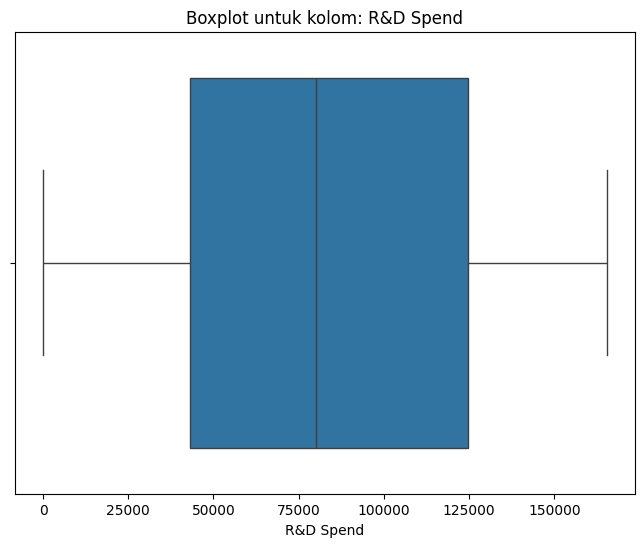

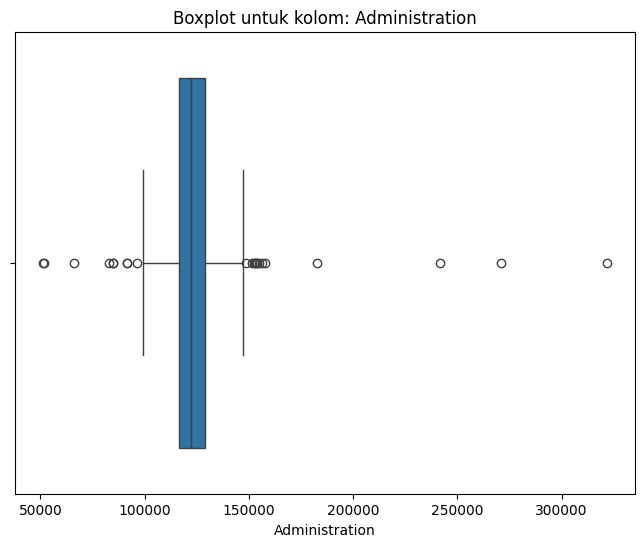

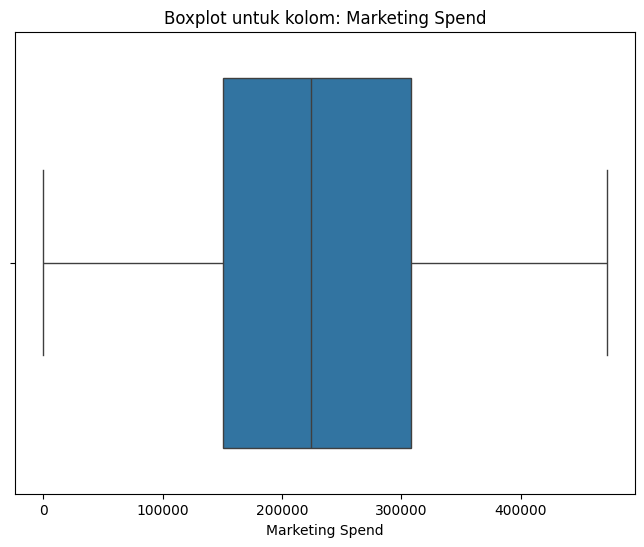

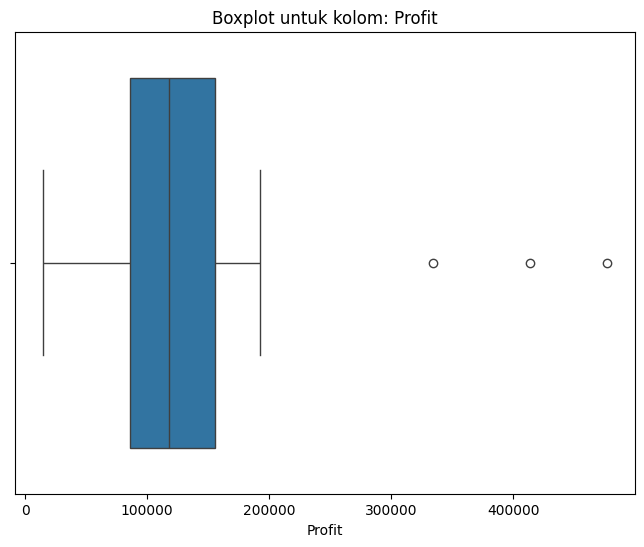

In [11]:
# Memilih hanya kolom numerik
df_outlier = df.select_dtypes(exclude=['object'])

# Membuat boxplot untuk setiap kolom numerik
for column in df_outlier:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=df_outlier, x=column)
    plt.title(f'Boxplot untuk kolom: {column}')
    plt.show()

Dari hasil analisis menunjukkan bahwa terdapat 1 duplikasi dalam dataset. Selain itu, terdeteksi outlier pada kolom Administration dan Profit yang perlu ditangani sebelum melanjutkan analisis lebih lanjut.

# **Exploratory Data Analysis (EDA)**

## **EDA - Univariate Analysis**

Pada tahap Univariate Analysis, dilakukan analisis distribusi untuk fitur kategorikal (`State`) dengan menghitung jumlah dan persentase kategori, serta divisualisasikan dengan diagram batang. Sedangkan untuk fitur numerik (`R&D Spend`, `Administration`, `Marketing Spend`, dan `Profit`), distribusi data divisualisasikan menggunakan histogram.

### **Fitur Kategorikal**

            jumlah sampel  persentase
State                                
California            344        34.4
New York              334        33.4
Florida               322        32.2


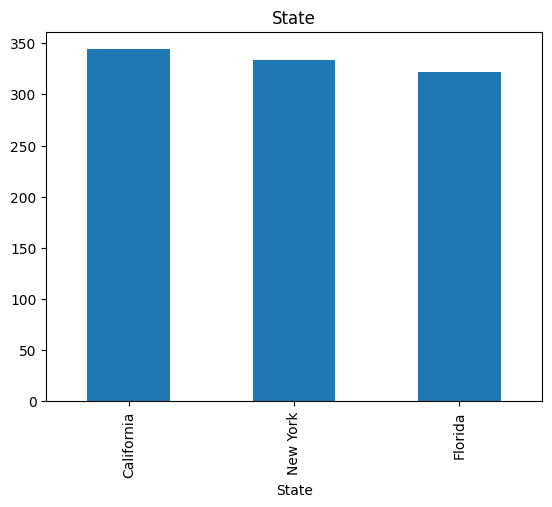

In [12]:
# Menentukan fitur kategorikal
categorical_features = ['State']

# Analisis distribusi data untuk fitur kategorikal
feature = categorical_features[0]
count = df[feature].value_counts()
percent = 100 * df[feature].value_counts(normalize=True)
df_baru = pd.DataFrame({'jumlah sampel': count, 'persentase': percent.round(1)})

# Menampilkan hasil dalam bentuk tabel
print(df_baru)

# Visualisasi distribusi kategori
count.plot(kind='bar', title=feature);

**Insight dari Fitur Kategorikal:**
- Distribusi sampel pada fitur kategorikal menunjukkan pembagian yang hampir merata antara California (34,3%), New York (33,2%), dan Florida (32,5%).
- California sedikit lebih dominan dibandingkan dengan New York dan Florida.

### **Fitur Numerik**

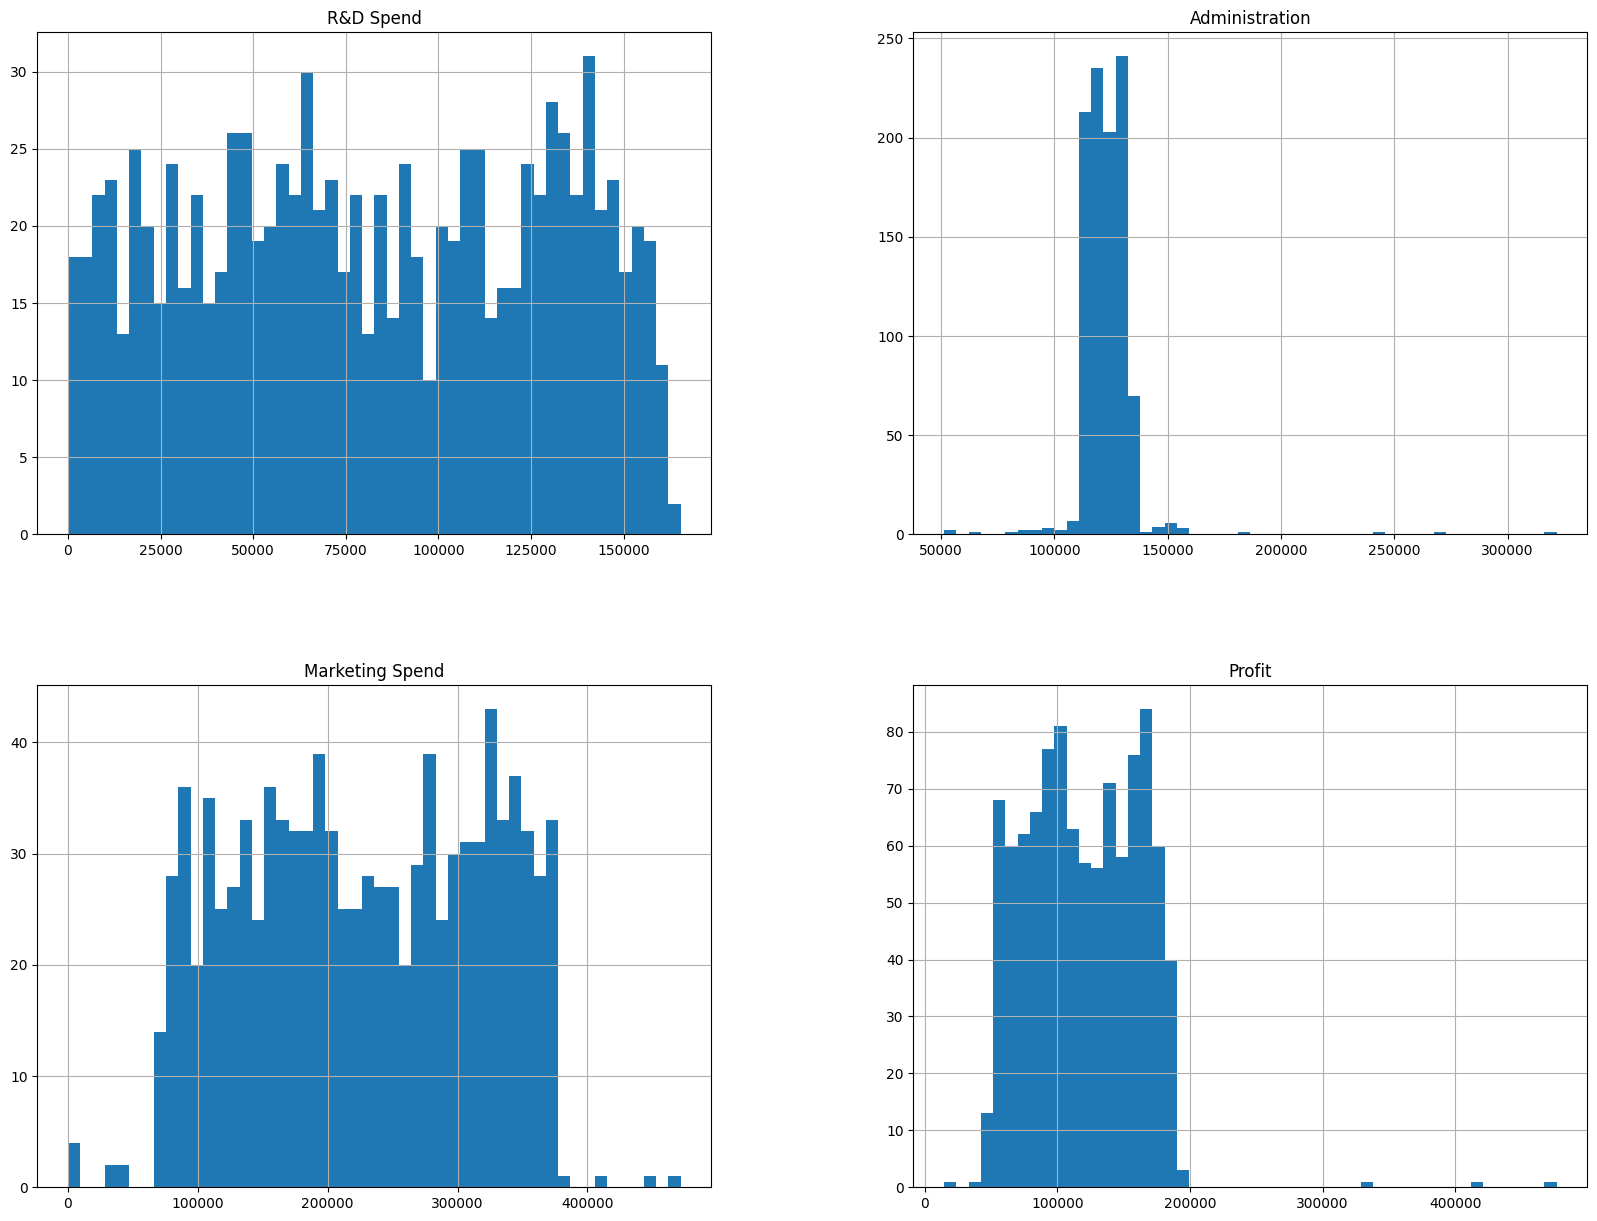

In [13]:
# Menentukan fitur numerik
numerical_features = ['R&D Spend', 'Administration', 'Marketing Spend', 'Profit']

# Menampilkan histogram untuk data yang sudah dibersihkan
df.hist(bins=50, figsize=(20,15))
plt.show()

**Insight dari Fitur Numerik:**
- R&D Spend dan Profit memiliki sebaran yang cukup luas.
- Administration lebih terkonsentrasi di rentang sempit.
- Marketing Spend menunjukkan variasi terbesar di antara fitur numerik lainnya.
- Secara keseluruhan, distribusi data cukup merata tanpa outlier ekstrem, meskipun ada sedikit celah dalam beberapa rentang nilai.

## **EDA - Multivariate Analysis**

Pada tahap Multivariate Analysis, dilakukan analisis untuk memahami hubungan antar fitur dalam dataset. Untuk fitur kategorikal (`State`), dianalisis hubungan antara kategori dengan `Profit` menggunakan diagram batang yang menunjukkan rata-rata nilai `Profit` berdasarkan kategori `State`. Sedangkan untuk fitur numerik (`R&D Spend`, `Administration`, `Marketing Spend`, dan `Profit`), hubungan antar fitur divisualisasikan menggunakan pairplot untuk melihat interaksi antara variabel numerik. Terakhir, matriks korelasi antar fitur numerik dihitung dan divisualisasikan dengan heatmap untuk menggambarkan sejauh mana keterkaitan antar variabel.

### **Categorical Features**

<ipython-input-14-d02a48734edc>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x=col, y="Profit", kind="bar", dodge=False, height=4, aspect=3, data=df, hue=None, palette="Set3")


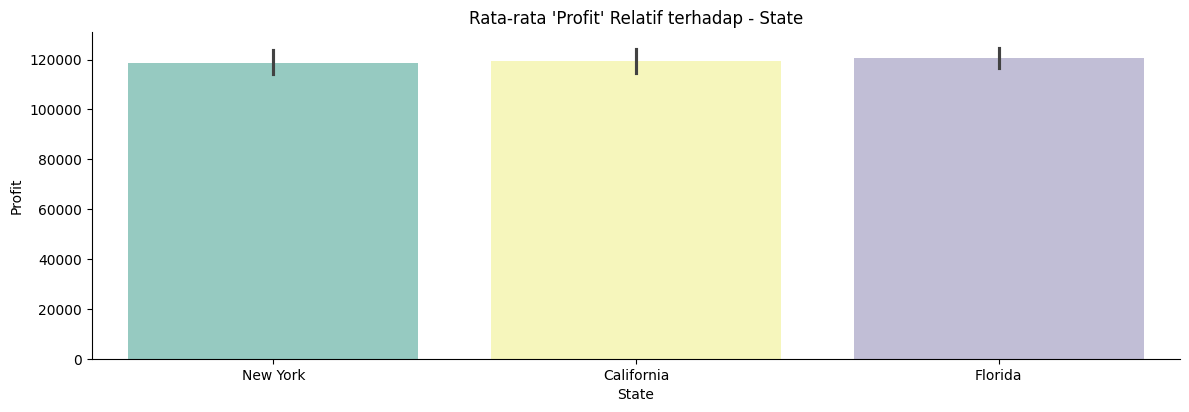

In [14]:
# Menentukan fitur kategorikal
categorical_features = ['State']

# Loop untuk membuat plot untuk setiap kolom kategori
for col in categorical_features:
    sns.catplot(x=col, y="Profit", kind="bar", dodge=False, height=4, aspect=3, data=df, hue=None, palette="Set3")
    plt.title("Rata-rata 'Profit' Relatif terhadap - {}".format(col))
    plt.show()

**Insight dari Fitur Kategorikal:**
- Berdasarkan analisis fitur kategorikal, rata-rata Profit di New York, Florida, dan California relatif mirip.
- Florida sedikit lebih unggul, namun perbedaannya tidak terlalu signifikan.

### **Numerical Features**

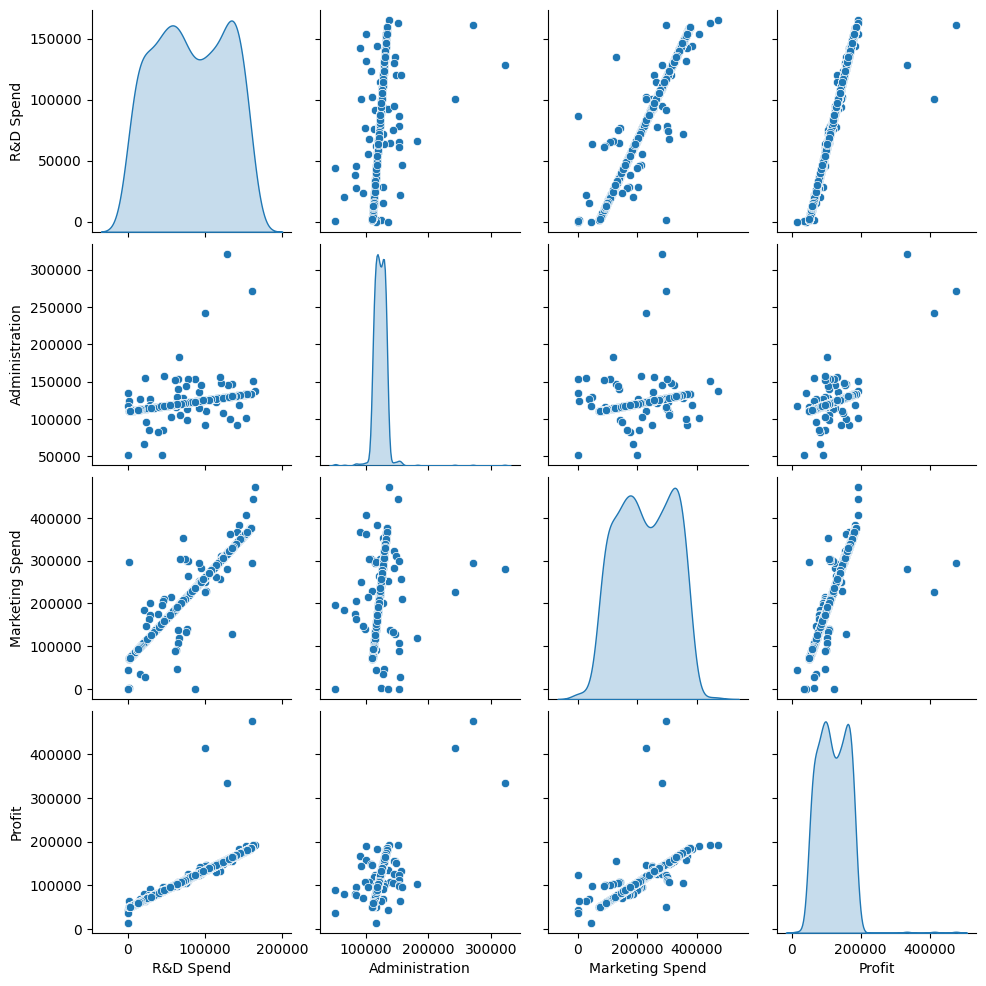

In [15]:
# Mengamati hubungan antar fitur numerik
sns.pairplot(df, diag_kind = 'kde')

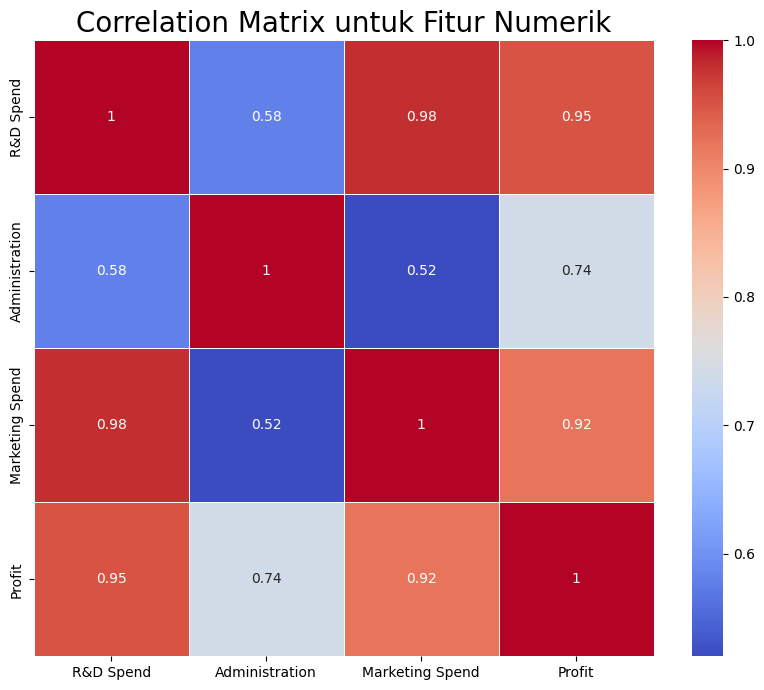

In [16]:
# Menentukan fitur numerik
numerical_features = ['R&D Spend', 'Administration', 'Marketing Spend', 'Profit']

# Membuat figure
plt.figure(figsize=(10, 8))

# Membuat matriks korelasi antar fitur numerik
correlation_matrix = df[numerical_features].corr().round(2)

# Membuat visualisasi korelasi dengan heatmap
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix untuk Fitur Numerik", size=20)
plt.show()

**Insight dari Fitur Numerik:**
- R&D Spend dan Marketing Spend memiliki hubungan sangat kuat dengan Profit.
- Administration juga berpengaruh positif terhadap Profit, namun tidak sekuat keduanya.
- Hal ini menunjukkan bahwa investasi pada riset dan pemasaran lebih berkontribusi terhadap peningkatan profit dibandingkan dengan administrasi.

# **Data Preparation**

Pada tahap Data Preparation, data duplikat dihapus, outlier ditangani menggunakan IQR, dan fitur kategorikal `State` diubah menjadi variabel numerik melalui one-hot encoding. Data dibagi menjadi data latih dan uji, kemudian fitur numerik dinormalisasi dengan `StandardScaler`. Terakhir, statistik deskriptif data latih yang sudah distandarisasi diperiksa untuk memastikan kualitas data yang siap digunakan dalam analisis atau pemodelan.

## **Menghapus Data Duplikat**

In [17]:
# Menghapus data duplikat
df_cleaned = df.drop_duplicates()

# Menampilkan data setelah duplikat dihapus
print("Jumlah duplikasi setelah dihapus: ", df_cleaned.duplicated().sum())

Jumlah duplikasi setelah dihapus:  0


## **Menangani Outliers**

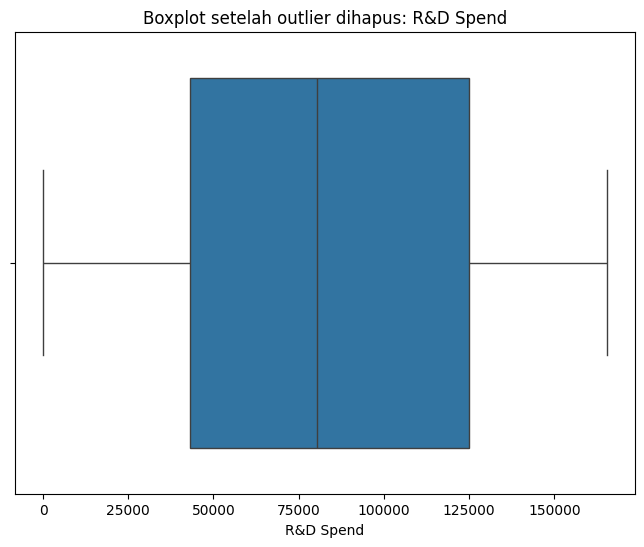

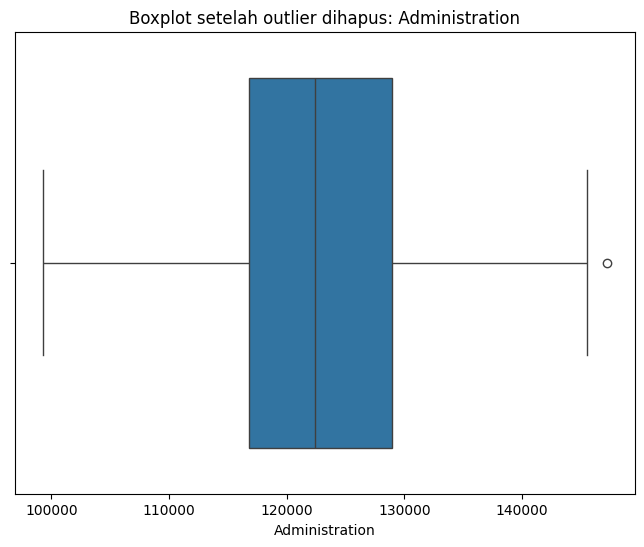

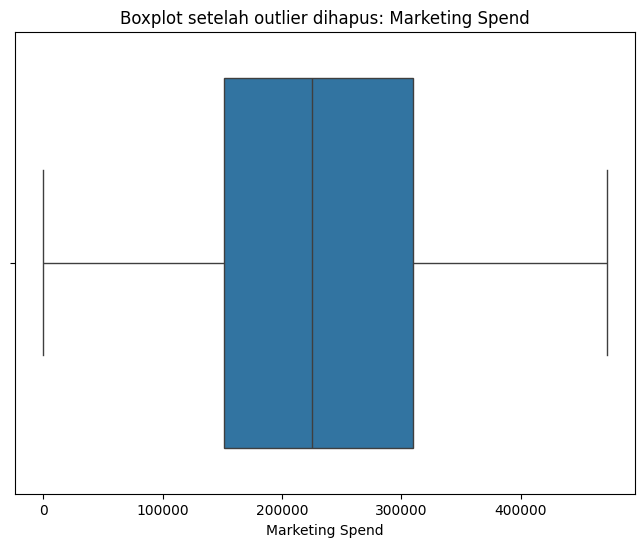

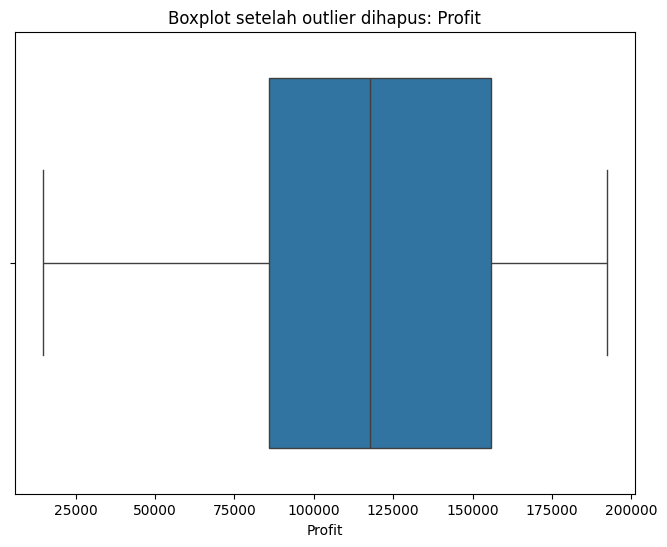

In [18]:
# Menghitung Q1 dan Q3 untuk setiap kolom numerik
numerical_features = df.select_dtypes(include=['number']).columns
Q1 = df[numerical_features].quantile(0.25)
Q3 = df[numerical_features].quantile(0.75)

# Menghitung IQR dan menghapus outlier
IQR = Q3 - Q1
df = df[~((df[numerical_features] < (Q1 - 1.5 * IQR)) | (df[numerical_features] > (Q3 + 1.5 * IQR))).any(axis=1)]

# Menampilkan boxplot setelah penanganan outlier
for column in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=df, x=column)
    plt.title(f'Boxplot setelah outlier dihapus: {column}')
    plt.show()

## **Encoding Fitur Kategori**

In [19]:
# Proses one-hot encoding
df = pd.concat([df, pd.get_dummies(df['State'], prefix='State')], axis=1)

# Menghapus kolom 'State' yang lama
df.drop(['State'], axis=1, inplace=True)

# Mengonversi kolom hasil one-hot encoding (yang berisi True/False) menjadi 1/0
df[['State_California', 'State_Florida', 'State_New York']] = df[['State_California', 'State_Florida', 'State_New York']].astype(int)

# Menampilkan data frame setelah diubah
print(df.head())

   R&D Spend  Administration  Marketing Spend     Profit  State_California  \
0  165349.20       136897.80        471784.10  192261.83                 0   
2  153441.51       101145.55        407934.54  191050.39                 0   
3  144372.41       118671.85        383199.62  182901.99                 0   
5  131876.90        99814.71        362861.36  156991.12                 0   
6  134615.46       147198.87        127716.82  156122.51                 1   

   State_Florida  State_New York  
0              0               1  
2              1               0  
3              0               1  
5              0               1  
6              0               0  


## **Train-Test-Split**

In [20]:
# Misalkan data disimpan dalam variabel df, dan kolom targetnya adalah 'Profit'
x = df.drop("Profit", axis=1)
y = df["Profit"]

# Membagi data menjadi data latih
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=123
)

# Menampilkan jumlah data keseluruhan, data latih, dan data uji
print(f'Jumlah total sampel dalam dataset: {len(x)}')
print(f'Jumlah sampel pada data latih: {len(x_train)}')
print(f'Jumlah sampel pada data uji: {len(x_test)}')

Jumlah total sampel dalam dataset: 978
Jumlah sampel pada data latih: 782
Jumlah sampel pada data uji: 196


## **Standarisasi**

In [21]:
# Menentukan fitur numerik
numerical_features = ['R&D Spend', 'Administration', 'Marketing Spend']

# Melakukan normalisasi data menggunakan StandardScaler
scaler = StandardScaler()
scaler.fit(x_train[numerical_features])
x_train[numerical_features] = scaler.transform(x_train.loc[:, numerical_features])
x_train[numerical_features].head()

,R&D Spend,Administration,Marketing Spend
189,1.582211,1.514426,1.550325
759,1.099921,1.052915,1.076837
109,-1.255463,-1.200989,-1.235562
94,0.937594,0.897582,0.917472
332,0.424775,0.406857,0.414012


In [22]:
# Menampilkan statistik deskriptif dari fitur numerik X_train setelah distandarisasi
x_train[numerical_features].describe().round(4)

,R&D Spend,Administration,Marketing Spend
count,782.0000,782.0000,782.0000
mean,-0.0000,0.0000,-0.0000
std,1.0006,1.0006,1.0006
min,-1.7551,-3.2370,-2.4790
25%,-0.8441,-0.8174,-0.8420
50%,-0.0468,-0.0257,-0.0290
75%,0.9064,0.8920,0.9003
max,1.8023,3.1471,2.6855


# **Model Development**

In [23]:
# Menyiapkan dataframe untuk analisis model
models = pd.DataFrame(index=['train_mse', 'test_mse'],
                      columns=['KNN', 'RandomForest', 'Boosting'])

## **K-Nearest Neighbor**

Model KNN dibangun dengan menggunakan KNeighborsRegressor dengan jumlah tetangga (neighbors) sebesar 10. Model ini dilatih menggunakan data pelatihan (x_train dan y_train), dan MSE untuk data pelatihan dihitung menggunakan mean_squared_error, yang kemudian disimpan dalam dataframe models pada kolom KNN dan baris train_mse.

In [24]:
# Membuat model prediksi KNN
knn = KNeighborsRegressor(n_neighbors=10)
knn.fit(x_train, y_train)

models.loc['train_mse','knn'] = mean_squared_error(y_pred = knn.predict(x_train), y_true=y_train)

## **Random Forest**

Model Random Forest dibangun menggunakan RandomForestRegressor dengan 50 estimator, kedalaman maksimum 16, dan pengaturan random_state untuk memastikan hasil yang konsisten. Model ini juga dilatih dengan data pelatihan, dan MSE untuk data pelatihan dihitung dan disimpan dalam dataframe pada kolom RandomForest dan baris train_mse.

In [25]:
# Membuat model prediksi Random forest
RF = RandomForestRegressor(n_estimators=50, max_depth=16, random_state=55, n_jobs=-1)
RF.fit(x_train, y_train)

models.loc['train_mse','RandomForest'] = mean_squared_error(y_pred=RF.predict(x_train), y_true=y_train)

## **Boosting**

Model Boosting dibangun menggunakan AdaBoostRegressor dengan learning rate sebesar 0.05 dan random_state yang sama. Model ini dilatih pada data pelatihan, dan MSE untuk data pelatihan dihitung dan disimpan dalam dataframe pada kolom Boosting dan baris train_mse.

In [26]:
# Membuat model boosting
boosting = AdaBoostRegressor(learning_rate=0.05, random_state=55)
boosting.fit(x_train, y_train)

models.loc['train_mse','Boosting'] = mean_squared_error(y_pred=boosting.predict(x_train), y_true=y_train)

# **Evaluasi Model**

Pada evaluasi model, data uji ditransformasi menggunakan scaler, lalu dihitung Mean Squared Error (MSE) untuk model KNN, Random Forest, dan Boosting. Hasil MSE dibandingkan dan divisualisasikan dalam diagram batang untuk menilai performa setiap model.

In [27]:
# Menggunakan scaler yang sudah dilatih untuk mentransformasi x_test
x_test[numerical_features] = scaler.transform(x_test[numerical_features])

# Menampilkan beberapa baris pertama dari data x_test setelah transformasi
x_test[numerical_features].head()

,R&D Spend,Administration,Marketing Spend
600,-1.688657,-1.615519,-1.660850
900,-0.157063,-0.149913,-0.157207
387,0.783852,0.750463,0.766536
733,1.478748,1.415420,1.448750
104,-0.509319,-0.486992,-0.503035


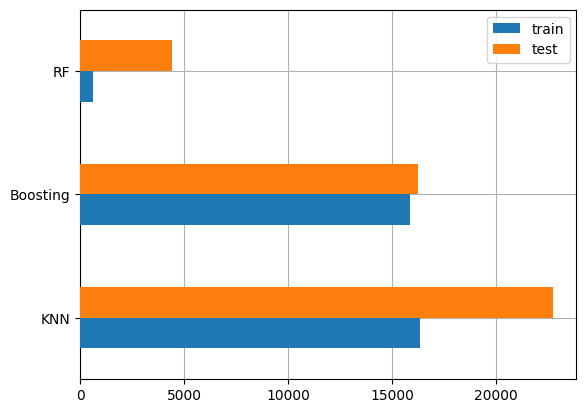

In [28]:
# Buat variabel mse yang isinya adalah dataframe nilai mse data train dan test pada masing-masing algoritma
mse = pd.DataFrame(columns=['train', 'test'], index=['KNN','RF','Boosting'])

# Buat dictionary untuk setiap algoritma yang digunakan
model_dict = {'KNN': knn, 'RF': RF, 'Boosting': boosting}

# Hitung Mean Squared Error masing-masing algoritma pada data train dan test
for name, model in model_dict.items():
    mse.loc[name, 'train'] = mean_squared_error(y_true=y_train, y_pred=model.predict(x_train))/1e3
    mse.loc[name, 'test'] = mean_squared_error(y_true=y_test, y_pred=model.predict(x_test))/1e3
fig, ax = plt.subplots()
mse.sort_values(by='test', ascending=False).plot(kind='barh', ax=ax, zorder=3)
ax.grid(zorder=0)

In [32]:
# Melihat hasil prediksi
prediksi = x_test.iloc[:1].copy()
pred_dict = {'y_true':y_test[:1]}

# Melakukan prediksi dengan masing-masing model dan menyimpan hasilnya
for name, model in model_dict.items():
    pred_dict['prediksi_'+name] = model.predict(prediksi).round(1)
pd.DataFrame(pred_dict)

,y_true,prediksi_KNN,prediksi_RF,prediksi_Boosting
600,51671.80519,52206.2,51716.2,57879.2


## **Interpretasi Hasil dan Keterkaitan dengan Tujuan Bisnis**

**Problem Statement 1:**
Bagaimana cara memprediksi kinerja finansial perusahaan berdasarkan pengeluaran di berbagai departemen (R&D, Administrasi, dan Marketing)?

**Goal 1:**
Mengembangkan model prediksi yang dapat secara akurat memprediksi kinerja finansial perusahaan berdasarkan pengeluaran di departemen R&D, Administrasi, dan Marketing untuk membantu pengambilan keputusan bisnis yang lebih tepat.

**Hasil & Interpretasi:**
Setelah mengevaluasi tiga model prediksi (KNN, Random Forest, dan Boosting) menggunakan MSE, diperoleh hasil:
- Random Forest (RF) memberikan MSE terkecil (4000–5000), menunjukkan prediksi paling akurat.
- K-Nearest Neighbor (KNN) menghasilkan MSE terbesar (~22000), menunjukkan performa yang kurang baik.
- Boosting mencatatkan MSE sedang (16000–17000), lebih tinggi dari RF dan kurang optimal.

Berdasarkan data evaluasi tambahan untuk contoh data aktual (y_true = 600), prediksi masing-masing model adalah:
- KNN: 51671,8
- RF: 52206,2
- Boosting: 57879,2

Dari hasil evaluasi, Random Forest terbukti sebagai model paling akurat untuk memprediksi kinerja finansial perusahaan berdasarkan pengeluaran di departemen R&D, Administrasi, dan Marketing. Model ini menghasilkan MSE terkecil dan prediksi yang paling mendekati nilai aktual, lebih baik dibandingkan dengan KNN dan Boosting.

Dengan keakuratan tersebut, Random Forest dapat mendukung pengambilan keputusan dalam pengelolaan anggaran perusahaan, membantu memperkirakan dampak pengeluaran pada kinerja finansial secara lebih presisi, dan memungkinkan perencanaan anggaran yang lebih efisien.

**Problem Statement 2:**
Bagaimana cara memilih model prediksi yang paling akurat untuk memprediksi kinerja finansial perusahaan dari beberapa model yang ada (seperti KNN, Random Forest, dan Boosting)?

**Goal 2:**
Menganalisis dan membandingkan berbagai model prediksi untuk menentukan model terbaik yang memberikan hasil paling akurat dalam memprediksi kinerja finansial berdasarkan data pengeluaran perusahaan.

**Hasil & Interpretasi:**
Berdasarkan analisis MSE serta evaluasi prediksi:
- Random Forest (RF) menjadi model terbaik karena memberikan error terkecil dibandingkan KNN dan Boosting.
- K-Nearest Neighbor (KNN) menunjukkan performa yang cukup stabil, tetapi belum seakurat RF.
- Boosting menghasilkan prediksi yang cenderung lebih besar (overestimated).

Berdasarkan data evaluasi tambahan untuk contoh data aktual (y_true = 600), prediksi masing-masing model adalah:
- KNN: 51671,8
- RF: 52206,2
- Boosting: 57879,2

Dari hasil ini, Random Forest memberikan prediksi yang paling mendekati nilai aktual, menunjukkan keakuratan model ini.

Secara keseluruhan, Random Forest adalah pilihan utama dalam kasus prediksi ini karena memberikan hasil yang paling akurat dan konsisten.